In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
classes = iris['class'].unique().tolist()

In [6]:
classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [7]:
replaceDict = dict ( zip( classes, range(len(classes)) ) )

In [8]:
replaceDict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [9]:
reversedReplaceDict = dict ( zip( range(len(classes)), classes) )

In [10]:
reversedReplaceDict

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [11]:
iris['class'].replace(replaceDict, inplace=True)

In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
d_train, d_test = train_test_split(iris, random_state=42, test_size=0.3)

In [14]:
X_train = d_train.drop('class', axis=1).values
X_test = d_test.drop('class', axis=1).values
Y_train = d_train['class'].values
Y_test = d_test['class'].values

## Modèle

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [16]:
def model(X, W, b):
    return sigmoid(X @ W + b)

In [17]:
def predict(X, W, b):
    return model(X, W, b) > 0.5

## Optimization

In [18]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [19]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

## Modèle entrainement

In [20]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=10000):
  # Initialisation
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    # Entrainement
    for i in range(n_iter):
        A = model(X, W, b)
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

    return W,b

# Classification : One vs One

## Entrainement

In [21]:
def OneVOne_Train(data, i, j):
    
    # Filter the subset
    class_filter = (data['class'] == i) | (data['class'] == j)
    subset = data[class_filter]

    X = subset.drop('class', axis=1).values
    Y = ((subset['class'] == i) - 0).values
    Y = Y.reshape((Y.shape[0], 1))

    W,b = regression_logistique(X, Y, n_iter=20000)
    return W, b

In [22]:
_1v1_W_0, _1v1_b_0 = OneVOne_Train(d_train, 0, 1)

In [23]:
_1v1_W_1, _1v1_b_1 = OneVOne_Train(d_train, 0, 2)

In [24]:
_1v1_W_2, _1v1_b_2 = OneVOne_Train(d_train, 1, 2)

## Prédiction et évaluation

### Données d'entrainement

In [25]:
_1v1_train_proba_0 = model(X_train, _1v1_W_0, _1v1_b_0)
_1v1_train_proba_1 = model(X_train, _1v1_W_1, _1v1_b_1)
_1v1_train_proba_2 = model(X_train, _1v1_W_2, _1v1_b_2)

In [116]:
_1v1_train_proba_0

array([[2.68872312e-04],
       [3.91533513e-07],
       [7.74669252e-08],
       [6.98807229e-05],
       [1.18285604e-08],
       [6.53239054e-05],
       [2.52508995e-10],
       [1.08411362e-05],
       [9.99915797e-01],
       [9.43540909e-11],
       [1.02928760e-04],
       [9.99895193e-01],
       [9.99938719e-01],
       [9.99265364e-01],
       [1.26585560e-04],
       [5.76763593e-07],
       [9.97059922e-01],
       [9.98421251e-01],
       [9.98581761e-01],
       [2.99158758e-05],
       [9.99791012e-01],
       [1.05247151e-04],
       [1.98371195e-09],
       [9.99594630e-01],
       [6.50701352e-05],
       [6.28790185e-08],
       [9.99994831e-01],
       [1.97836743e-06],
       [8.91249458e-08],
       [4.34768256e-05],
       [8.62410079e-06],
       [1.45241700e-07],
       [2.22538528e-05],
       [9.99881872e-01],
       [1.08746338e-03],
       [5.59621418e-08],
       [9.99816147e-01],
       [9.99918889e-01],
       [1.30950592e-04],
       [1.60800077e-06],


In [26]:
_1v1_train_0_votes = np.where(_1v1_train_proba_0 > 0.5, 0, 1) # Préduction si la plante est de classe 0 ou 1
_1v1_train_1_votes = np.where(_1v1_train_proba_1 > 0.5, 0, 2) # Préduction si la plante est de classe 0 ou 2
_1v1_train_2_votes = np.where(_1v1_train_proba_2 > 0.5, 1, 2) # Préduction si la plante est de classe 1 ou 2

In [27]:
_1v1_all_train_votes = np.hstack((_1v1_train_0_votes, _1v1_train_1_votes, _1v1_train_2_votes))

In [28]:
_1v1_all_train_votes

array([[1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [0,

In [29]:
_1v1_train_predictions = np.apply_along_axis(lambda row : np.argmax(np.bincount(row)), axis=1, arr=_1v1_all_train_votes)

In [30]:
_1v1_train_predictions

array([1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
_1v1_train_cm = confusion_matrix(Y_train, _1v1_train_predictions)

<Axes: >

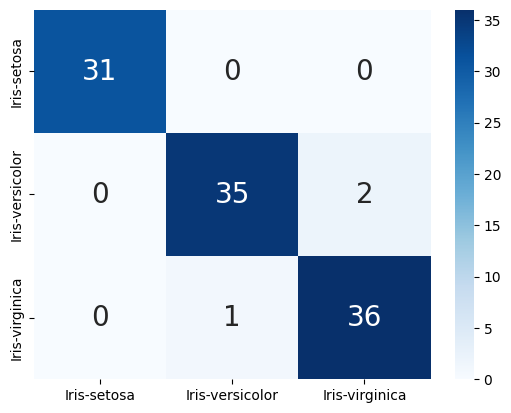

In [33]:
sns.heatmap(_1v1_train_cm, annot=True, cmap='Blues', annot_kws={'size': 20}, xticklabels=replaceDict, yticklabels=replaceDict)

In [34]:
def coef(cm_matrix):
    return np.diag(cm_matrix).sum() / cm_matrix.sum()

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(Y_train, _1v1_train_predictions)

0.9714285714285714

In [37]:
coef(_1v1_train_cm)

0.9714285714285714

### Données du test

In [38]:
_1v1_test_proba_0 = model(X_test, _1v1_W_0, _1v1_b_0)
_1v1_test_proba_1 = model(X_test, _1v1_W_1, _1v1_b_1)
_1v1_test_proba_2 = model(X_test, _1v1_W_2, _1v1_b_2)

_1v1_test_0_votes = np.where(_1v1_test_proba_0 > 0.5, 0, 1) # Préduction si la plante est de classe 0 ou 1
_1v1_test_1_votes = np.where(_1v1_test_proba_1 > 0.5, 0, 2) # Préduction si la plante est de classe 0 ou 2
_1v1_test_2_votes = np.where(_1v1_test_proba_2 > 0.5, 1, 2) # Préduction si la plante est de classe 1 ou 2

In [39]:
_1v1_all_test_votes = np.hstack((_1v1_test_0_votes, _1v1_test_1_votes, _1v1_test_2_votes))

In [40]:
_1v1_all_test_votes

array([[1, 2, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 2, 2],
       [1, 2, 1],
       [1, 2, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [41]:
_1v1_test_predictions = np.apply_along_axis(lambda row : np.argmax(np.bincount(row)), axis=1, arr=_1v1_all_test_votes)

In [42]:
_1v1_test_cm = confusion_matrix(Y_test, _1v1_test_predictions)

<Axes: >

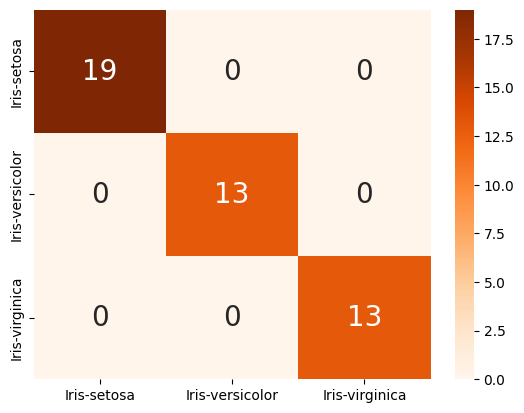

In [43]:
sns.heatmap(_1v1_test_cm, annot=True, cmap='Oranges', annot_kws={'size': 20}, xticklabels=replaceDict, yticklabels=replaceDict)

In [44]:
coef(_1v1_test_cm)

1.0

# Classification : One vs All

## Entrainement

In [50]:
def OneVAll(data, i):
    
    # Filter the subset
    condition = (data['class'] == i)

    X = data.drop('class', axis=1).values
    Y = (condition - 0).values
    Y = Y.reshape((Y.shape[0], 1))

    W,b = regression_logistique(X, Y, n_iter=40000)
    return W,b

In [51]:
_1va_W_0, _1va_b_0 = OneVAll(d_train, 0)

In [52]:
_1va_W_1, _1va_b_1 = OneVAll(d_train, 1)

In [53]:
_1va_W_2, _1va_b_2 = OneVAll(d_train, 2)

## Prédiction et évaluation

### Données d'entrainement

In [55]:
_1va_train_proba_0 = model(X_train, _1va_W_0, _1va_b_0)
_1va_train_proba_1 = model(X_train, _1va_W_1, _1va_b_1)
_1va_train_proba_2 = model(X_train, _1va_W_2, _1va_b_2)

In [57]:
_1va_train_probabilities = np.hstack((_1va_train_proba_0, _1va_train_proba_1, _1va_train_proba_2))

In [58]:
_1va_train_probabilities

array([[2.68689691e-04, 8.25546211e-01, 1.56960786e-04],
       [3.21364145e-07, 5.91351236e-01, 4.09553891e-01],
       [4.67423134e-08, 2.82396666e-01, 9.41989608e-01],
       [5.97561280e-05, 3.02632821e-01, 2.99993919e-04],
       [3.77128587e-09, 2.38464927e-02, 9.99375874e-01],
       [4.95068527e-05, 4.15744208e-01, 1.34265668e-03],
       [1.74426755e-10, 4.17315041e-01, 9.99900219e-01],
       [6.52066538e-06, 3.07696883e-01, 4.40855566e-02],
       [9.99942958e-01, 6.63705587e-02, 9.56930351e-17],
       [7.89373206e-11, 6.58176723e-01, 9.99946538e-01],
       [1.17851170e-04, 7.10049818e-01, 1.01744190e-04],
       [9.99931186e-01, 8.95402091e-02, 1.29933365e-16],
       [9.99950436e-01, 4.95376729e-02, 1.87784049e-16],
       [9.99404891e-01, 2.64388065e-02, 2.26796430e-15],
       [1.10567388e-04, 9.41781937e-01, 3.27388210e-03],
       [3.07658262e-07, 4.58673866e-01, 8.71232798e-01],
       [9.98086721e-01, 1.47272300e-01, 1.23227413e-14],
       [9.98986345e-01, 3.24989

In [59]:
_1va_train_predictions = np.argmax(_1va_train_probabilities, axis=1)

In [61]:
_1va_train_predictions

array([1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [62]:
_1va_train_cm = confusion_matrix(Y_train, _1va_train_predictions)

<Axes: >

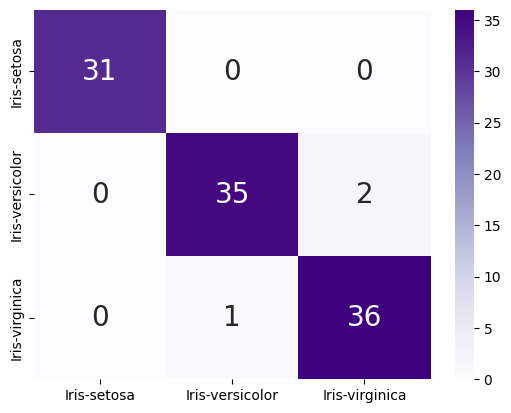

In [63]:
sns.heatmap(_1va_train_cm, annot=True, cmap='Purples', annot_kws={'size': 20}, xticklabels=replaceDict, yticklabels=replaceDict)

In [64]:
coef(_1va_train_cm)

0.9714285714285714

In [94]:
_1va_train_table = d_train.copy()
_1va_train_table[['proba_setosa', 'proba_virsicolor', 'proba_verginica']] = np.round(_1va_train_probabilities * 100, decimals=2)
_1va_train_table["prediction"] = _1va_train_predictions
_1va_train_table.replace({'prediction': reversedReplaceDict, 'class' : reversedReplaceDict}, inplace=True)

In [95]:
_1va_train_table

,sepal_length,sepal_width,petal_length,petal_width,class,proba_setosa,proba_virsicolor,proba_verginica,prediction
81,5.5,2.4,3.7,1.0,Iris-versicolor,0.03,82.55,0.02,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica,0.00,59.14,40.96,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica,0.00,28.24,94.20,Iris-virginica
75,6.6,3.0,4.4,1.4,Iris-versicolor,0.01,30.26,0.03,Iris-versicolor
109,7.2,3.6,6.1,2.5,Iris-virginica,0.00,2.38,99.94,Iris-virginica
...,...,...,...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,Iris-versicolor,0.02,43.50,0.02,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica,0.00,63.18,98.91,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa,100.00,0.95,0.00,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor,0.01,66.50,0.07,Iris-versicolor


In [96]:
false_train_predictions = (_1va_train_table["class"] != _1va_train_table["prediction"])

In [98]:
_1va_train_table[false_train_predictions]

,sepal_length,sepal_width,petal_length,petal_width,class,proba_setosa,proba_virsicolor,proba_verginica,prediction
133,6.3,2.8,5.1,1.5,Iris-virginica,0.0,59.14,40.96,Iris-versicolor
70,5.9,3.2,4.8,1.8,Iris-versicolor,0.0,12.96,35.51,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor,0.0,62.92,90.72,Iris-virginica


### Données du test

In [99]:
_1va_test_proba_0 = model(X_test, _1va_W_0, _1va_b_0)
_1va_test_proba_1 = model(X_test, _1va_W_1, _1va_b_1)
_1va_test_proba_2 = model(X_test, _1va_W_2, _1va_b_2)

In [100]:
_1va_test_probabilities = np.hstack((_1va_test_proba_0, _1va_test_proba_1, _1va_test_proba_2))

In [101]:
_1va_test_probabilities

array([[5.11766500e-06, 6.61178987e-01, 5.92237318e-03],
       [9.99935062e-01, 2.47973229e-02, 3.08392423e-17],
       [5.93324621e-12, 7.03198710e-01, 9.99999775e-01],
       [8.18994822e-06, 3.70389542e-01, 2.18738598e-02],
       [4.46699461e-06, 5.54204190e-01, 6.98983468e-03],
       [9.99842423e-01, 6.31817752e-02, 8.54024367e-16],
       [1.19983827e-03, 2.82815464e-01, 4.17549625e-05],
       [2.16577355e-07, 7.37096877e-02, 9.66485002e-01],
       [1.10168181e-06, 8.59973717e-01, 5.14228946e-01],
       [2.05910328e-04, 5.61039124e-01, 1.97196936e-04],
       [3.94101313e-07, 1.05406086e-01, 7.65875930e-01],
       [9.99664929e-01, 3.36518858e-01, 2.61648115e-15],
       [9.99981176e-01, 5.71302068e-02, 1.28375877e-17],
       [9.99633422e-01, 2.82510215e-01, 1.83189237e-15],
       [9.99950823e-01, 2.22008283e-02, 6.77927160e-17],
       [1.14548899e-05, 1.24056981e-01, 5.55229867e-03],
       [2.43789689e-09, 2.30996342e-01, 9.99859181e-01],
       [1.07093583e-04, 7.64539

In [102]:
_1va_test_predictions = np.argmax(_1va_test_probabilities, axis=1)

In [103]:
_1va_test_predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0], dtype=int64)

In [104]:
_1va_test_cm = confusion_matrix(Y_test, _1va_test_predictions)

<Axes: >

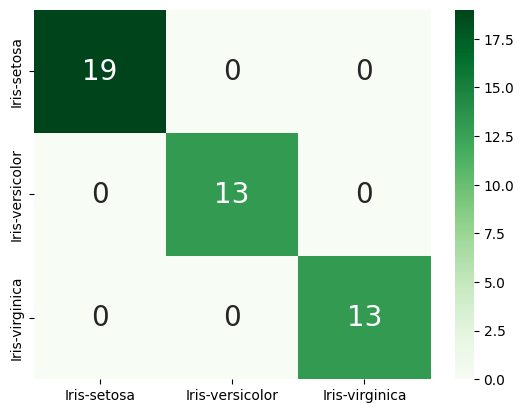

In [105]:
sns.heatmap(_1va_test_cm, annot=True, cmap='Greens', annot_kws={'size': 20}, xticklabels=replaceDict, yticklabels=replaceDict)

In [106]:
coef(_1va_test_cm)

1.0

In [108]:
_1va_test_table = d_test.copy()
_1va_test_table[['proba_setosa', 'proba_virsicolor', 'proba_verginica']] = np.round(_1va_test_probabilities * 100, decimals=2)
_1va_test_table["prediction"] = _1va_test_predictions
_1va_test_table.replace({'prediction': reversedReplaceDict, 'class' : reversedReplaceDict}, inplace=True)

In [109]:
false_test_predictions = (_1va_test_table["class"] != _1va_test_table["prediction"])

In [113]:
_1va_test_table[false_test_predictions].size

0